In [1]:
import sys
!{sys.executable} -m pip install neptune
!{sys.executable} -m pip install dash
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install kaleido
!{sys.executable} -m pip install autorank
!{sys.executable} -m pip install nbformat


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import  numpy as np
import neptune
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, Markdown
import kaleido
default_colors = px.colors.qualitative.G10


/tmp/ipykernel_2495491/1832702141.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.set_palette(palette=default_colors)

# Define a function to apply the default theme
def apply_default_theme(fig):
    fig.update_layout(
        template='plotly_white',

    )
    fig.update_xaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig.update_yaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )

In [4]:
#specific color mapping
color_mapping = {
    'ML2DAC': default_colors[1],
    'Autocluster': default_colors[0],
    'AutoML4Clust': default_colors[2],
    'cSmartML': default_colors[3]
}

# Read data experiments

Read already processed experiments data, to get this results the mean per dataset per each framework across all round of experiments was calculated

In [5]:
# get data of each framework
autocluster_framework = pd.read_csv("experiments_data/autocluster_experiments.csv", index_col=0)
csmartml_framework = pd.read_csv("experiments_data/csmartml_experiments.csv", index_col=0)
ml2dac_framework = pd.read_csv("experiments_data/ml2dac_experiments.csv", index_col=0)
automl4clust_framework = pd.read_csv("experiments_data/automl4clust_experiments.csv", index_col=0)

# Read dataset containing information about datasets used during experiments
dataset = pd.read_csv('dataset.csv')

# Include some datasets information on each experiments frwamework dataset
automl4clust_framework = pd.merge(automl4clust_framework,dataset[['dataset', 'dataset_dim', 'dataset_instances']], on='dataset')
ml2dac_framework = pd.merge(ml2dac_framework,dataset[['dataset', 'dataset_dim', 'dataset_instances']], on='dataset')
csmartml_framework = pd.merge(csmartml_framework,dataset[['dataset', 'dataset_dim', 'dataset_instances']], on='dataset')
autocluster_framework = pd.merge(autocluster_framework,dataset[['dataset', 'dataset_dim', 'dataset_instances']], on='dataset')

automl4clust_framework = automl4clust_framework.groupby(by=["dataset", "framework"], as_index=False).mean()
ml2dac_framework = ml2dac_framework.groupby(by=["dataset", "framework"], as_index=False).mean()
csmartml_framework = csmartml_framework.groupby(by=["dataset", "framework"], as_index=False).mean()
autocluster_framework = autocluster_framework.groupby(by=["dataset", "framework"], as_index=False).mean()

# Definition of some utilities functions

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_average_values(data, x_column, y_column, title, x_label, y_label, figsize=(10, 6), hue_column=None, title_legend='', rotate=0, x_fontsize=12, color_mapping=None, label_fontsize = 16, save=True, save_name=""):
    """
    Plot the average values using Seaborn, optionally with hue.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        x_column (str): The column name for the x-axis.
        y_column (str): The column name for the y-axis.
        title (str): The title for the plot.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
        figsize (tuple): A tuple specifying the figure size.
        hue_column (str, optional): The column name for hue (e.g., optimization method).
        color_mapping (dict, optional): A dictionary mapping hues to colors.
    """
    plt.figure(figsize=figsize)

    if color_mapping:
        # Create a palette based on the color mapping
        sns.barplot(data=data, x=x_column, y=y_column, hue=hue_column, palette=color_mapping)
        plt.legend(title=title_legend, title_fontsize="12")
    elif hue_column:
        sns.barplot(data=data, x=x_column, y=y_column, hue=hue_column)
        plt.legend(title=title_legend, title_fontsize="12")
    else:
        sns.barplot(data=data, x=x_column, y=y_column)

    if rotate != 0:
        # Rotate x-axis labels if needed
        plt.xticks(rotation=rotate)

    plt.xticks(fontsize=x_fontsize)
    plt.yticks(fontsize=x_fontsize)
    plt.xlabel(x_label, fontsize=label_fontsize)
    plt.ylabel(y_label, fontsize=label_fontsize)
    plt.title(title)

    plt.tight_layout()
    if save:
        plt.savefig(f'figures/{save_name}.png', format='png')
    plt.show()


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_box_plot(data, x_column, y_column, title, x_label, y_label, ylim=None, figsize=(10, 6), x_rotation=0, hue=None, save=False, x_fontsize=16, y_fontsize=16, color_mapping=color_mapping, use_color_mapping = False, save_name= ""):
    """
    Create a box plot using Seaborn.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        x_column (str): The column name for the x-axis.
        y_column (str): The column name for the y-axis.
        title (str): The title for the plot.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
        ylim (tuple): A tuple specifying the y-axis limits (optional).
        figsize (tuple): A tuple specifying the figure size (optional).
        x_fontsize (int): Font size of the x-axis labels (optional).
    """
    plt.figure(figsize=figsize)
    if use_color_mapping == True:
        sns.boxplot(data=data, x=x_column, y=y_column, hue=hue, palette=color_mapping)
    else:
        sns.boxplot(data=data, x=x_column, y=y_column, hue=hue)
    plt.title(title)
    plt.xlabel(x_label, fontsize=x_fontsize)
    plt.ylabel(y_label, fontsize=y_fontsize)

    plt.xticks(rotation=x_rotation, fontsize=x_fontsize)
    plt.yticks(fontsize=y_fontsize)
    plt.legend(title='', title_fontsize="14")


    if ylim:
        plt.ylim(ylim[0], ylim[1])

    plt.tight_layout()
    if save:
        plt.savefig(f'figures/{save_name}.png', format='png')
    plt.show()


In [8]:
def plot_metric_trend(dataframe: pd.DataFrame, x_column:str, y_column:str, color_column:str, default_colors:dict, title, y_range=None, frac=0.5, x_column_title='', y_column_title='',
                      tickfont = 16, axes_title_font_size = 18, save_name=""):
    """
    Plots a scatter plot with LOWESS trendlines for the specified metric.

    Parameters:
    - dataframe: DataFrame containing the data to plot.
    - x_column: String, the name of the column to be used on the x-axis.
    - y_column: String, the name of the column to be used on the y-axis.
    - color_column: String, the name of the column to be used for color grouping.
    - default_colors: List, default colors for each group.
    - title: String, title of the plot.
    - y_range: Tuple or None, the range for the y-axis.
    - frac: Float, fraction of data points used for LOWESS.

    Returns:
    - fig: Plotly figure object.
    """
    color_mapping = default_colors

    fig = px.scatter(dataframe, x=x_column, y=y_column, color=color_column,
                     trendline="lowess", color_discrete_map=color_mapping, trendline_options=dict(frac=frac),
                     title=title)
    fig.data = [t for t in fig.data if t.mode == "lines"]
    fig.update_traces(showlegend=True) # trendlines have showlegend=False by default
    # Update axis titles and tick label font sizes
    fig.update_yaxes(title=y_column_title, range=y_range, title_font=dict(size=axes_title_font_size), tickfont=dict(size=tickfont))
    fig.update_xaxes(title=x_column_title, title_font=dict(size=axes_title_font_size), tickfont=dict(size=tickfont))

    fig.update_layout(legend=dict(
        title='',
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        font=dict(
            size=16
        )
    ))


    apply_default_theme(fig)  # Assuming this function is defined elsewhere
    pio.write_image(fig, f"figures/{save_name}.png", scale=2)


In [9]:
def plot_spline_data(df, x_column, y_column, color_mapping, smoothing=0.4, y_column_title="", x_column_title="", y_range=[0,40], axes_title_font_size=12, tickfont=12, save_name="line_plot_running_time_dim"):
    """
    Plot benchmark data for each framework.

    Args:
    - benchmark_df_grouped_dim (DataFrame): DataFrame containing benchmark data grouped by dimension and framework.
    - color_mapping (dict): Dictionary mapping framework names to colors.
    - smoothing (float): Smoothing factor for the spline curves.

    Returns:
    - None (displays the plot)
    """
    fig = go.Figure()
    for framework, color in color_mapping.items():
        filtered_df = df[df['framework'] == framework]
        fig.add_trace(go.Scatter(
            x=filtered_df[x_column],
            y=filtered_df[y_column],
            name=framework,
            mode='lines',
            line=dict(color=color, smoothing=smoothing),
            line_shape='spline'
        ))
    
    fig.update_yaxes(title=y_column_title, range=y_range, title_font=dict(size=axes_title_font_size), tickfont=dict(size=tickfont))
    fig.update_xaxes(title=x_column_title, title_font=dict(size=axes_title_font_size), tickfont=dict(size=tickfont))
    fig.update_layout(legend=dict(
        title='',
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        font=dict(
            size=16
        )
    ))


    apply_default_theme(fig)  # Assuming this function is defined elsewhere
    pio.write_image(fig, f"figures/{save_name}.png", scale=2)


# Quality Criteria

In [10]:
# Make a single dataframe from the framework experiments
benchmark_df = pd.concat([autocluster_framework, csmartml_framework, automl4clust_framework, ml2dac_framework], ignore_index=True)
benchmark_df.dropna(inplace=True)
benchmark_df.reset_index(inplace=True, drop=True)

In [11]:
# Define a custom aggregation function for population standard deviation
def pop_std(x):
    return x.std(ddof=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


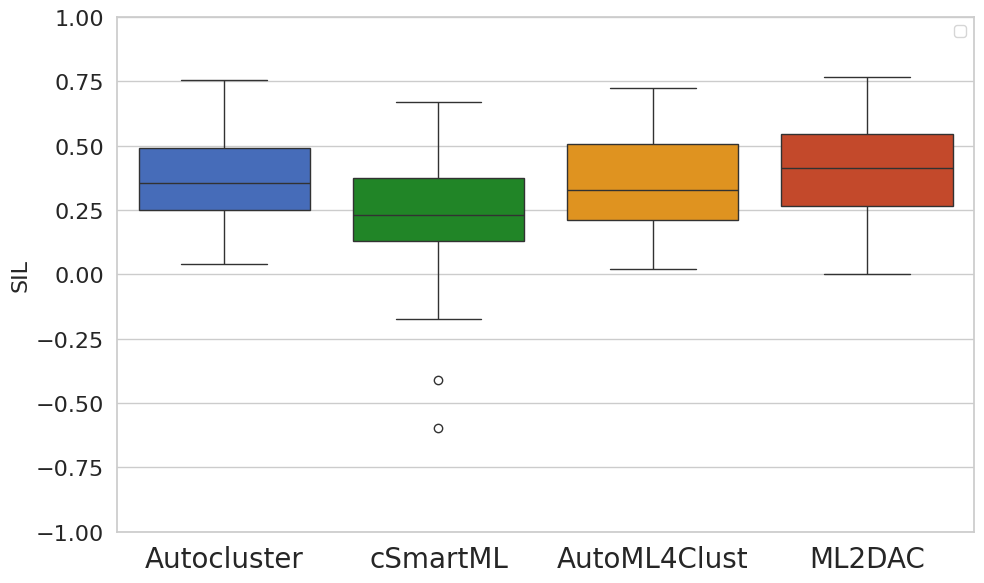

In [12]:
create_box_plot(data=benchmark_df, x_column='framework', y_column='sil', x_label='',
                y_label='SIL', ylim=[-1,1], hue='framework', title='', x_fontsize=20, use_color_mapping=True,
                  save=True, save_name="box_plot_dataset_sil")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


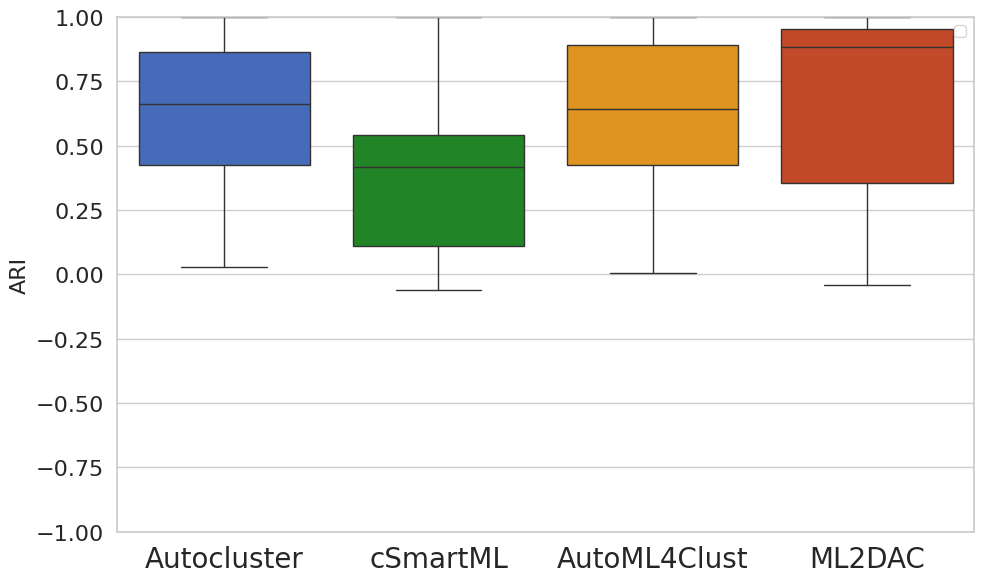

In [13]:
create_box_plot(data=benchmark_df, x_column='framework', y_column='ari', x_label='',
                y_label='ARI', ylim=[-1,1], hue='framework', title='', x_fontsize=20, use_color_mapping=True,
                  save=True, save_name="box_plot_dataset_ari")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


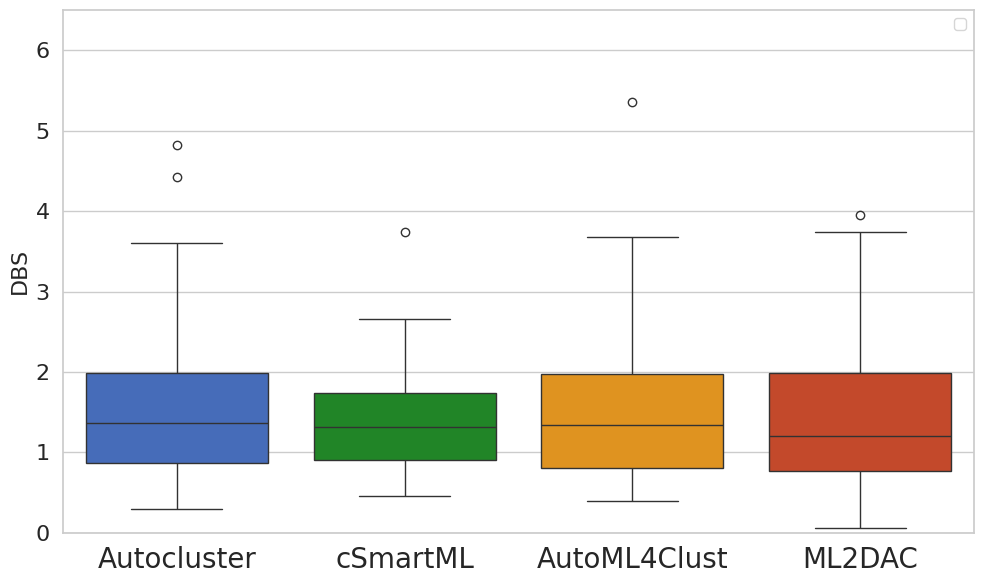

In [14]:
create_box_plot(data=benchmark_df, x_column='framework', y_column='dbs', x_label='',
                y_label='DBS', ylim=[0,6.5], hue='framework', title='', x_fontsize=20, use_color_mapping=True,
                  save=True, save_name="box_plot_dataset_dbs")

In [15]:
plot_metric_trend(dataframe=benchmark_df,
                        x_column='dataset_dim',
                        y_column='sil', 
                        color_column='framework',
                        default_colors= color_mapping,
                        title="",
                        y_range=[-1,1],
                        x_column_title='Dataset dimension',
                        y_column_title='Silhouette', 
                        save_name="trendline_sil_dataset_dim")


/home/licari/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [16]:
fig = plot_metric_trend(dataframe=benchmark_df,
                        x_column='dataset_instances',
                        y_column='sil', 
                        color_column='framework',
                        default_colors= color_mapping,
                        title="",
                        y_range=[0,1],
                        x_column_title='Dataset instances',
                        y_column_title='Silhouette',
                        save_name="trendline_sil_dataset_instances")

/home/licari/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
fig = plot_metric_trend(dataframe=benchmark_df,
                        x_column='dataset_dim',
                        y_column='ari', 
                        color_column='framework',
                        default_colors=color_mapping,
                        title="",
                        y_range=[-1,1],
                        x_column_title='Dataset dimension',
                        y_column_title='Adjusted Rand',
                        save_name="trendline_ari_dataset_dim")


/home/licari/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [18]:
fig = plot_metric_trend(dataframe=benchmark_df,
                        x_column='dataset_instances',
                        y_column='ari', 
                        color_column='framework',
                        default_colors=color_mapping,
                        title="",
                        y_range=[0,1],
                        x_column_title='Dataset instances',
                        y_column_title='Adjusted Rand',
                        save_name="trendline_sil_dataset_instances")

/home/licari/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [19]:
fig = plot_metric_trend(dataframe=benchmark_df,
                        x_column='dataset_dim',
                        y_column='dbs', 
                        color_column='framework',
                        default_colors= color_mapping,
                        title="",
                        x_column_title='Dataset dimension',
                        y_column_title='Davies Bouldin',
                        save_name="trendline_dbs_dataset_dim", 
                        y_range=[0,3])

/home/licari/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [20]:
fig = plot_metric_trend(dataframe=benchmark_df,
                        x_column='dataset_instances',
                        y_column='dbs', 
                        color_column='framework',
                        default_colors= color_mapping,
                        title="",
                        x_column_title='Dataset instances',
                        y_column_title='Davies Bouldin',
                        save_name="trendline_dbs_dataset_instances",
                        y_range=[0,3])

/home/licari/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Statistical Analysis

/home/licari/.local/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/licari/.local/lib/python3.10/site-packages/autorank/_util.py:511: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/licari/.local/lib/python3.10/site-packages/autorank/_util.py:512: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/licari/.local/lib/python3.10/site-packages/autorank/_util.py:519: FutureWarn

RankResult(rankdf=
              meanrank      mean       std  ci_lower  ci_upper effect_size  \
framework                                                                    
cSmartML      3.362637  0.236743  0.206832  0.169472  0.304013         0.0   
AutoML4Clust  2.420000  0.356563  0.183558  0.299612  0.413514   -0.612761   
Autocluster   2.335000  0.371300  0.158116  0.322242  0.420357    -0.73092   
ML2DAC        1.825000  0.402128  0.183656  0.345147   0.45911   -0.845582   

               magnitude  
framework                 
cSmartML      negligible  
AutoML4Clust      medium  
Autocluster       medium  
ML2DAC             large  
pvalue=nan
cd=0.5684128931263431
omnibus=friedman
posthoc=nemenyi
all_normal=True
pvals_shapiro=[0.39827872755384836, 0.24859117428480987, 1.0, 0.0030880870265162404]
homoscedastic=False
pval_homogeneity=nan
homogeneity_test=bartlett
alpha=0.01
alpha_normality=0.0025
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=N

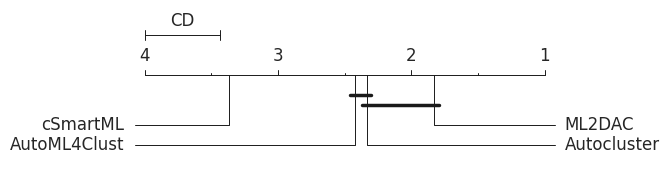

In [21]:
from autorank import autorank, plot_stats, create_report, latex_table
columns_sil = ['sil', 'framework', 'dataset']
columns_ari = ['ari', 'framework', 'dataset']
columns_dbs = ['dbs', 'framework', 'dataset']
benchmark_autorank_sil = benchmark_df[columns_sil].copy()
benchmark_autorank_ari = benchmark_df[columns_ari].copy()
benchmark_autorank_dbs = benchmark_df[columns_dbs].copy()

pivot_benchmark_sil = pd.pivot_table(benchmark_autorank_sil, index='dataset', columns='framework', values='sil')
sil_result = autorank(pivot_benchmark_sil, alpha=0.01, verbose=False, rope=0.4)
print(sil_result)
plot_stats(sil_result)
plt.savefig("figures/cd_sil.png")
plt.show()


RankResult(rankdf=
              meanrank    median       mad  ci_lower  ci_upper effect_size  \
framework                                                                    
cSmartML      3.241758  0.418497       NaN  0.192713  0.561287         NaN   
AutoML4Clust  2.360000  0.642920  0.245699  0.470741  0.883793         NaN   
Autocluster   2.265000  0.660215  0.226894  0.465734  0.848285         NaN   
ML2DAC        2.065000  0.881525   0.10992  0.513781  0.945084         NaN   

             magnitude  
framework               
cSmartML         large  
AutoML4Clust     large  
Autocluster      large  
ML2DAC           large  
pvalue=nan
cd=0.5684128931263431
omnibus=friedman
posthoc=nemenyi
all_normal=False
pvals_shapiro=[5.628607610834832e-06, 1.2146978326866395e-11, 1.0, 3.2849625536194224e-06]
homoscedastic=False
pval_homogeneity=nan
homogeneity_test=levene
alpha=0.01
alpha_normality=0.0025
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=None
eff

/home/licari/.local/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/licari/.local/lib/python3.10/site-packages/autorank/_util.py:511: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/licari/.local/lib/python3.10/site-packages/autorank/_util.py:512: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/licari/.local/lib/python3.10/site-packages/autorank/_util.py:519: FutureWarn

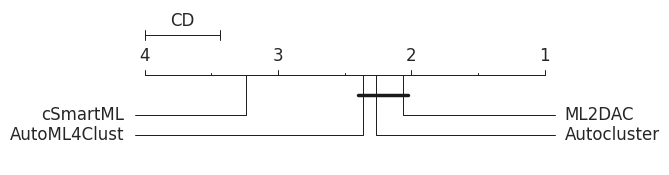

In [22]:
pivot_benchmark_ari = pd.pivot_table(benchmark_autorank_ari, index='dataset', columns='framework', values='ari')
ari_result = autorank(pivot_benchmark_ari, alpha=0.01, verbose=False, rope=0.4)
print(ari_result)
plot_stats(ari_result, allow_insignificant=True)
plt.savefig("figures/cd_ari.png")
plt.show()

RankResult(rankdf=
              meanrank    median       mad  ci_lower  ci_upper effect_size  \
framework                                                                    
ML2DAC        2.200000  1.199795  0.530923  0.863105  1.924827         0.0   
Autocluster   2.465000  1.366573  0.552746  0.932737  1.909116   -0.207568   
cSmartML      2.598901  1.309755       NaN  0.997992  1.851781         NaN   
AutoML4Clust  2.610000  1.335991  0.577395  0.887266  1.896867   -0.165624   

               magnitude  
framework                 
ML2DAC        negligible  
Autocluster        small  
cSmartML           large  
AutoML4Clust  negligible  
pvalue=nan
cd=0.5684128931263431
omnibus=friedman
posthoc=nemenyi
all_normal=False
pvals_shapiro=[1.0, 5.540856663722256e-15, 3.62209948843431e-06, 2.3308153530122227e-12]
homoscedastic=False
pval_homogeneity=nan
homogeneity_test=levene
alpha=0.01
alpha_normality=0.0025
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mod

/home/licari/.local/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/licari/.local/lib/python3.10/site-packages/autorank/_util.py:511: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/licari/.local/lib/python3.10/site-packages/autorank/_util.py:512: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/licari/.local/lib/python3.10/site-packages/autorank/_util.py:519: FutureWarn

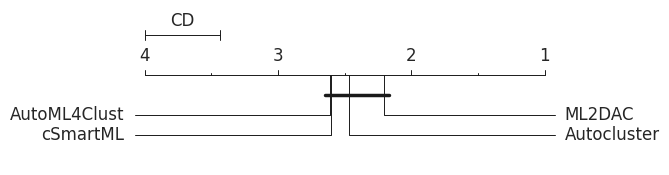

In [23]:
pivot_benchmark_dbs = pd.pivot_table(benchmark_autorank_dbs, index='dataset', columns='framework', values='dbs')
dbs_result = autorank(pivot_benchmark_dbs, alpha=0.01, verbose=False, rope=0.4, order='ascending')
print(dbs_result)
plot_stats(dbs_result)
plt.savefig("figures/cd_dbs.png")
plt.show()

## BBT

In [24]:
def get_pivot_df_framework_per_score(df, index, col, values, col_to_consider = []):
    df = df[col_to_consider].copy()
    return df.pivot_table(index=index, columns=col, values=values, aggfunc='mean')

get_pivot_df_framework_per_score(benchmark_df, 'dataset', 'framework', 'sil', ['dataset', 'framework', 'sil']).to_csv('bbt_data/bbtcomp_sil.csv')
get_pivot_df_framework_per_score(benchmark_df, 'dataset', 'framework', 'ari', ['dataset', 'framework', 'ari']).to_csv('bbt_data/bbtcomp_ari.csv')
get_pivot_df_framework_per_score(benchmark_df, 'dataset', 'framework', 'dbs', ['dataset', 'framework', 'dbs']).to_csv('bbt_data/bbtcomp_dbs.csv')


# Scalability

In [25]:
col_to_consider = ["dataset_dim", "dataset_instances", "framework", "monitoring_memory", "running_time_min"]
benchmark_df_grouped_dim = benchmark_df[col_to_consider].groupby(by=['dataset_dim', 'framework'], as_index=False).mean().reset_index(drop=True)
benchmark_df_grouped_dim = benchmark_df_grouped_dim[['dataset_dim', 'framework', 'running_time_min']]

In [26]:
# Figure 3
plot_spline_data(benchmark_df_grouped_dim, x_column="dataset_dim", y_column="running_time_min", color_mapping=color_mapping,
                 y_column_title="Running Time (min)", x_column_title="Dataset dimension")

In [27]:
benchmark_df_grouped_inst = benchmark_df[col_to_consider].groupby(by=['dataset_instances', 'framework'], as_index=False).mean().reset_index(drop=True)
benchmark_df_grouped_inst = benchmark_df_grouped_inst[['dataset_instances', 'framework', 'running_time_min']]
#Figure 4 (a)
plot_metric_trend(dataframe=benchmark_df_grouped_inst,
                        x_column='dataset_instances',
                        y_column='running_time_min', 
                        color_column='framework',
                        default_colors=color_mapping,
                        title="",
                        x_column_title='Dataset instances',
                        y_column_title='Mean running time (min)',
                        save_name="trendline_running_time_min_per_dataset_instances")


/home/licari/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [28]:
#Figure 4 (b)
fig = plot_metric_trend(dataframe=benchmark_df_grouped_dim,
                        x_column='dataset_dim',
                        y_column='running_time_min', 
                        color_column='framework',
                        default_colors=color_mapping,
                        title="",
                        x_column_title='Dataset dimension',
                        y_column_title='Mean running time (min)',
                        save_name="trendline_running_time_min_per_dataset_dim")

/home/licari/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

